# Analysis of the LLY stock

Analyis of the LLY stock during the Eli Lilly insulin is free disinformation event on 18:36 10-11-2022 UTC. 

Written by Tran Khanh Nguyen and Luc Bijl

In [1]:
import pandas as pd
date_of_event = pd.to_datetime('2022-11-10 18:36')

In [2]:
data_1min = pd.read_excel('../datasets/lly-stock-data/data-lly-1min.xlsx')

In [3]:
data_1min['timestamp_UTC'] = pd.to_datetime(data_1min['timestamp']) + pd.to_timedelta('05:00:00')

In [4]:
data_1min.sort_values(by=['timestamp_UTC'],inplace=True)
data_1min.reset_index(inplace=True)
data_1min.head(5)

,index,Unnamed: 0,timestamp,open,high,low,close,volume,return,volatility,timestamp_UTC
0,0,0,2022-11-01 09:30:00,342.158,343.866,341.385,341.400,5054,-0.002218,0.004836,2022-11-01 14:30:00
1,1,1,2022-11-01 09:31:00,341.950,342.579,340.515,341.222,121017,-0.002131,0.004787,2022-11-01 14:31:00
2,2,2,2022-11-01 09:32:00,341.327,341.738,338.833,340.883,64789,-0.001302,0.004678,2022-11-01 14:32:00
3,3,3,2022-11-01 09:33:00,340.877,346.320,340.663,346.267,91834,0.015688,0.004588,2022-11-01 14:33:00
4,4,4,2022-11-01 09:34:00,346.284,348.595,345.501,346.520,58366,0.000681,0.004521,2022-11-01 14:34:00


In [5]:
data_1min.drop(columns=['index','Unnamed: 0'],inplace=True)
data_1min.head(5)

,timestamp,open,high,low,close,volume,return,volatility,timestamp_UTC
0,2022-11-01 09:30:00,342.158,343.866,341.385,341.400,5054,-0.002218,0.004836,2022-11-01 14:30:00
1,2022-11-01 09:31:00,341.950,342.579,340.515,341.222,121017,-0.002131,0.004787,2022-11-01 14:31:00
2,2022-11-01 09:32:00,341.327,341.738,338.833,340.883,64789,-0.001302,0.004678,2022-11-01 14:32:00
3,2022-11-01 09:33:00,340.877,346.320,340.663,346.267,91834,0.015688,0.004588,2022-11-01 14:33:00
4,2022-11-01 09:34:00,346.284,348.595,345.501,346.520,58366,0.000681,0.004521,2022-11-01 14:34:00


In [6]:
index = (data_1min['timestamp_UTC'] <= pd.to_datetime('2022-11-11 21:00:00')) & (data_1min['timestamp_UTC'] >= pd.to_datetime('2022-11-10 14:30:00'))
data_1min_filter = data_1min.loc[index]
data_1min_filter.reset_index(inplace=True)
data_1min_filter.head(5)

,index,timestamp,open,high,low,close,volume,return,volatility,timestamp_UTC
0,2724,2022-11-10 09:30:00,359.343,359.579,359.262,359.386,21687,0.000120,0.000757,2022-11-10 14:30:00
1,2725,2022-11-10 09:31:00,359.274,359.638,359.074,359.465,27315,0.000531,0.000773,2022-11-10 14:31:00
2,2726,2022-11-10 09:32:00,363.341,365.120,362.074,362.938,40241,-0.001110,0.002259,2022-11-10 14:32:00
3,2727,2022-11-10 09:33:00,362.386,363.052,361.517,361.770,3725,-0.001701,0.002205,2022-11-10 14:33:00
4,2728,2022-11-10 09:34:00,361.891,362.250,361.211,361.543,5515,-0.000962,0.002154,2022-11-10 14:34:00


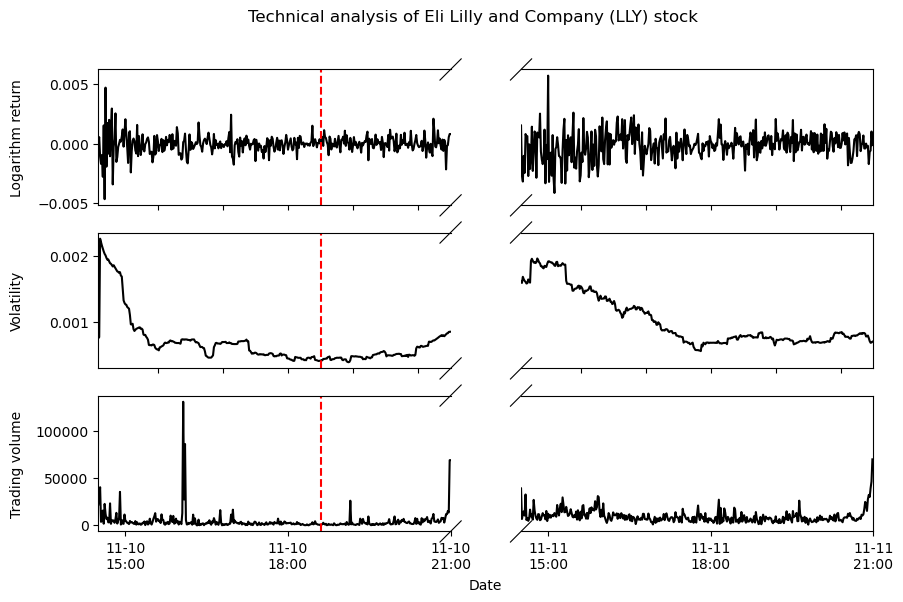

In [7]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.dates import date2num, DateFormatter, HourLocator
from brokenaxes import brokenaxes

fig = plt.figure(figsize=(10,6))
fig.suptitle('Technical analysis of Eli Lilly and Company (LLY) stock')

sps1, sps2, sps3 = GridSpec(3,1)

bax = brokenaxes(xlims = (
            (
                pd.Timestamp('2022-11-10 14:30:00'),
                pd.Timestamp('2022-11-10 21:00:00'),
            ),
            (
                pd.Timestamp('2022-11-11 14:30:00'),
                pd.Timestamp('2022-11-11 21:00:00'),
            ),
        ),
        despine=False,
        subplot_spec=sps1
    )

bax.plot(data_1min_filter['timestamp_UTC'], data_1min_filter['return'], color='black', linestyle='-')
bax.set_ylabel('Logarithm return', labelpad=50)
bax.axvline(date_of_event , color='red', linestyle='--')
plt.setp(bax.get_xticklabels(), visible=False)

bax = brokenaxes(xlims = (
            (
                pd.Timestamp('2022-11-10 14:30:00'),
                pd.Timestamp('2022-11-10 21:00:00'),
            ),
            (
                pd.Timestamp('2022-11-11 14:30:00'),
                pd.Timestamp('2022-11-11 21:00:00'),
            ),
        ),
        despine=False,
        subplot_spec=sps2,
    )

bax.plot(data_1min_filter['timestamp_UTC'],data_1min_filter['volatility'], color='black', linestyle='-')
bax.set_ylabel('Volatility', labelpad=50)
bax.axvline(date_of_event , color='red', linestyle='--')
plt.setp(bax.get_xticklabels(), visible=False)

bax = brokenaxes(xlims = (
            (
                pd.Timestamp('2022-11-10 14:30:00'),
                pd.Timestamp('2022-11-10 21:00:00'),
            ),
            (
                pd.Timestamp('2022-11-11 14:30:00'),
                pd.Timestamp('2022-11-11 21:00:00'),
            ),
        ),
        despine=False,
        subplot_spec=sps3
    )

bax.plot(data_1min_filter['timestamp_UTC'],data_1min_filter['volume'], color='black', linestyle='-')
bax.set_xlabel('Date', labelpad=30)
bax.set_ylabel('Trading volume', labelpad=50)
bax.axvline(date_of_event , color='red', linestyle='--')
date_format = DateFormatter("%m-%d\n%H:%M")
for ax in bax.axs:
    ax.xaxis.set_major_formatter(date_format)

bax.last_row[0].set_xticks([
    pd.Timestamp('2022-11-10 15:00:00'),
    pd.Timestamp('2022-11-10 18:00:00'),
    pd.Timestamp('2022-11-10 21:00:00')
])

bax.last_row[1].set_xticks([
    pd.Timestamp('2022-11-11 15:00:00'),
    pd.Timestamp('2022-11-11 18:00:00'),
    pd.Timestamp('2022-11-11 21:00:00')
])

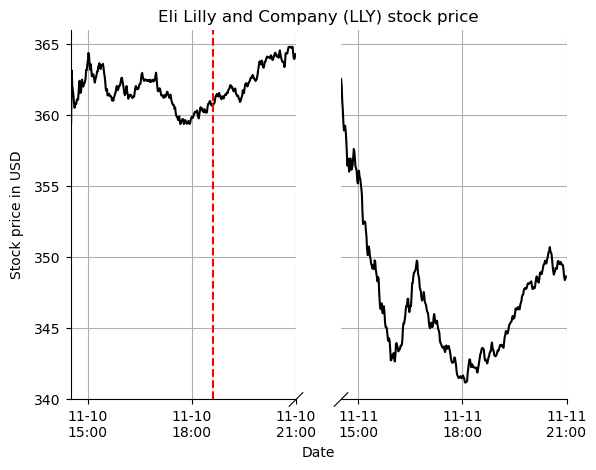

In [8]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter, HourLocator
from brokenaxes import brokenaxes

def make_plot():

    bax = brokenaxes(
        xlims = (
            (
                pd.Timestamp('2022-11-10 14:30:00'),
                pd.Timestamp('2022-11-10 21:00:00'),
            ),
            (
                pd.Timestamp('2022-11-11 14:30:00'),
                pd.Timestamp('2022-11-11 21:00:00'),
            ),
        ),
        despine=True,
    )
    bax.plot(data_1min_filter['timestamp_UTC'], (data_1min_filter['open'] + data_1min_filter['close']) / 2, color='black', linestyle='-')

    bax.grid(True)
    bax.set_title('Eli Lilly and Company (LLY) stock price')
    bax.axvline(date_of_event , color='red', linestyle='--')
    bax.set_xlabel('Date', labelpad=30)
    bax.set_ylabel('Stock price in USD')

    return bax

fig = plt.figure()
bax = make_plot()

bax.last_row[0].set_xticks([
    pd.Timestamp('2022-11-10 15:00:00'),
    pd.Timestamp('2022-11-10 18:00:00'),
    pd.Timestamp('2022-11-10 21:00:00')
])

bax.last_row[1].set_xticks([
    pd.Timestamp('2022-11-11 15:00:00'),
    pd.Timestamp('2022-11-11 18:00:00'),
    pd.Timestamp('2022-11-11 21:00:00')
])

date_format = DateFormatter("%m-%d\n%H:%M")
for ax in bax.axs:
    ax.xaxis.set_major_formatter(date_format)